In [1]:
# importing libraries
import numpy as np # For numerical computation
import pandas as pd # Data manipulation
import seaborn as sns # plotting
import scipy.io # reading matlab files in python
from scipy import signal #signal processing
from scipy.fftpack import fft, dct #signal processing
from tqdm import tqdm
from sklearn.linear_model import LinearRegression #linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt # For plotting graphs(Visualization)

import os # system-wide functions

In [2]:
sample_file = scipy.io.loadmat(f'../data/raw/BloodPressureDataset/part_{1}.mat')
print(f'sample_file Data type: {type(sample_file)}')
print(f'sample_file keys:\n{sample_file.keys()}')

sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])


In [3]:
# Loading a sample .mat file to understand the data dimensions
test_sample = sample_file['p']
print(f'test_sample Data type: {type(test_sample)}')
print(f'test_sample shape/dimensions: {test_sample.shape}')

test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)


In [4]:
print(test_sample[0].shape)
print(test_sample[0][0].shape)
print(test_sample[0][0][0][0])
print(type(test_sample[0][0][0][0]))
# for i in range(1000):
    # print(test_sample[0][i].shape[1])

(1000,)
(3, 61000)
1.7595307917888563
<class 'numpy.float64'>


In [5]:

target = test_sample[0][0][:2,:]
print(target.shape)
target = target.transpose(1,0)
print(target.shape)

(2, 61000)
(61000, 2)


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler_ppg = MinMaxScaler()
scaler_abp = MinMaxScaler()
target[:,1] = scaler_abp.fit_transform(target[:,1].reshape(-1,1)).squeeze()
target[:,0] = scaler_ppg.fit_transform(target[:,0].reshape(-1,1)).squeeze()

(61000, 2)

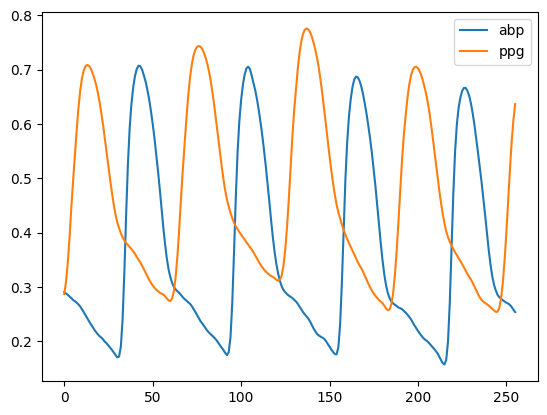

In [12]:
start = 10000
len = 256
plt.figure()
plt.plot(target[start:start+len,1],label='abp')
plt.plot(target[start:start+len,0],label='ppg')
plt.legend()
target.shape

In [11]:
def minmax_norm(sig):
    return (sig-np.nanmin(sig))/(np.nanmax(sig)-np.nanmin(sig))

# convert to .npy file

In [3]:
sample_size = 38000 # 125 * 60* 5
signal_windowed = []
signal_windowed_train = []
signal_windowed_test = []
maxbp = -1
minbp = 10000
for i in range(12):
    data = scipy.io.loadmat(f'../data/raw/BloodPressureDataset/part_{i+1}.mat')['p']
    os.makedirs(f"../data/raw/BPDataset_norm/p00/p0000{i:02d}",exist_ok=True)
    for j in tqdm(range(1000)):
        # windowing
        number = str(i*1000+j)
        target = data[0][j][:2,:]
        # (2, n) -> (n, 2)
        target = target.transpose(1,0)
        # [ppg,abp] -> [abp,ppg] 
        target = target[:,[1,0]]
        # maxbp = max(maxbp,np.nanmax(target[:,0]))
        # minbp = min(minbp,np.nanmin(target[:,0]))
        # target[:,1] = minmax_norm(target[:,1])
        np.save(f"../data/raw/BPDataset_norm/p00/p0000{i:02d}/0000000_{j:04d}.npy",target)
        

100%|██████████| 1000/1000 [00:00<00:00, 8849.58it/s]


In [4]:
maxbp,minbp

(199.98749589709124, 50.0)